# BREAST CANCER PREDICTION ML MODELS

**IMPORTING REQUIRED LIBRARIES**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import joblib

**LOADING THE DATA**

In [2]:
df = pd.read_csv(r"C:\Users\anura\Breast-Cancer-Predictor\Breast Cancer Data.csv")

In [3]:
df.shape

(569, 33)

In [4]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
212,8810703,M,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,...,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,NaN
166,87127,B,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,...,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699,NaN
310,893783,B,11.70,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,...,26.55,80.92,483.1,0.12230,0.10870,0.07915,0.05741,0.3487,0.06958,NaN
471,9113816,B,12.04,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,...,33.33,87.24,567.6,0.10410,0.09726,0.05524,0.05547,0.2404,0.06639,NaN
112,86409,B,14.26,19.65,97.83,629.9,0.07837,0.22330,0.30030,0.07798,...,23.73,107.00,709.0,0.08949,0.41930,0.67830,0.15050,0.2398,0.10820,NaN


In [5]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [55]:
#Dropping the Unnamed column
df = df.dropna(axis=1)

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

C:\Users\anura\new_ws\fresh_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


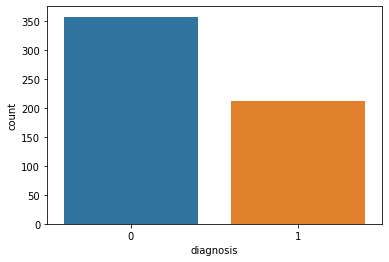

In [56]:
sns.countplot(df['diagnosis'],label="Count");

**ENCODING THE CATEGORICAL DATA**

In [19]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'].values)

In [20]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
431,907915,0,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.027990,...,12.88,22.91,89.61,515.8,0.1450,0.26290,0.24030,0.07370,0.2556,0.09359
379,9013838,1,11.08,18.83,73.30,361.6,0.12160,0.21540,0.16890,0.063670,...,13.24,32.82,91.76,508.1,0.2184,0.93790,0.84020,0.25240,0.4154,0.14030
95,86208,1,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.086830,...,24.22,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368
461,911296202,1,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.168900,...,36.04,31.37,251.20,4254.0,0.1357,0.42560,0.68330,0.26250,0.2641,0.07427
316,894090,0,12.18,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,...,12.85,16.47,81.60,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037


In [57]:
#Correlation b/w diff columns
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


**HEATMAP TO VISUALIZE CORRELATION**

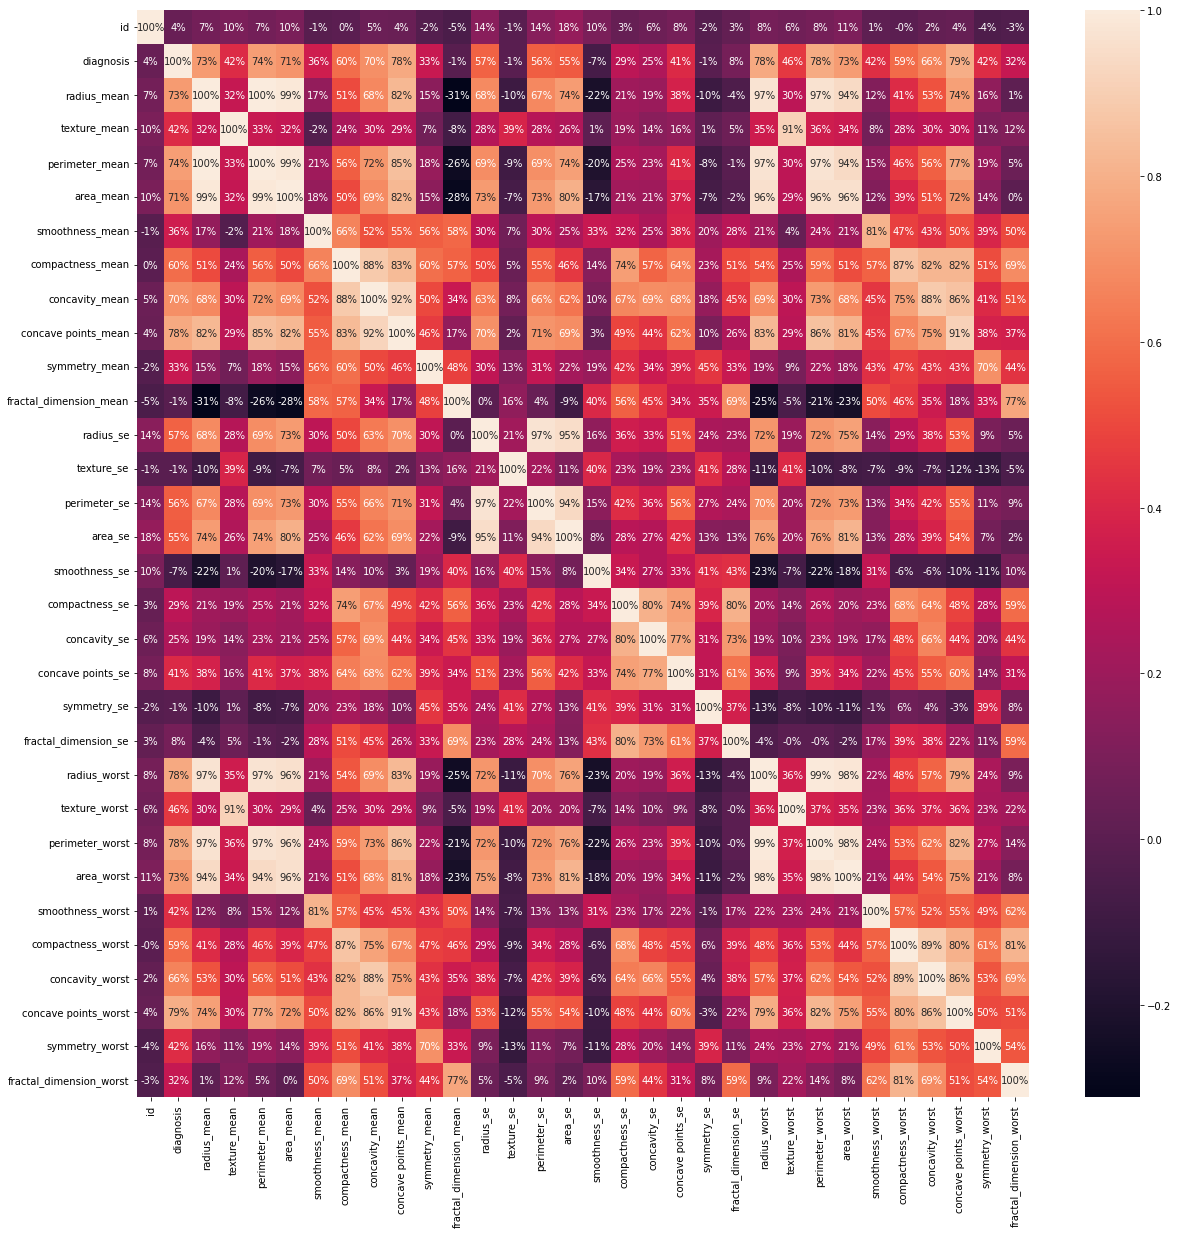

In [26]:
plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(), annot=True, fmt='.0%');

In [27]:
input_cols = list(df.columns)
input_cols.remove('diagnosis')
target_col = 'diagnosis'

In [28]:
inputs_df = df[input_cols].copy()
target_df = df[target_col].copy()

**SPLITTING THE DATA INTO B/W TRAINING AND TESTING**

In [29]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs_df, target_df, test_size = 0.2, random_state = 0)

In [30]:
train_inputs.sample(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
260,887549,20.310,27.06,132.90,1288.0,0.1000,0.10880,0.1519,0.09333,0.1814,...,24.330,39.16,162.30,1844.0,0.1522,0.29450,0.3788,0.1697,0.3151,0.07999
314,894047,8.597,18.60,54.09,221.2,0.1074,0.05847,0.0000,0.00000,0.2163,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.0000,0.0000,0.3142,0.08116


In [31]:
train_target.sample(2)

0      1
299    0
Name: diagnosis, dtype: int32

**SCALING THE DATA**

In [32]:
scaler = StandardScaler()
train_inputs = scaler.fit_transform(train_inputs)
test_inputs = scaler.transform(test_inputs)

**TRAINING THREE DIFFERENT ML MODELS**

In [37]:
def bc_models(train_inputs, train_target):
    
    #LogisticRegression Model
    model_log = LogisticRegression(random_state=0)
    model_log.fit(train_inputs, train_target)
    
    #Training Accuracy
    print('[1]Logistic Regression Model Training Accuracy:', model_log.score(train_inputs, train_target))
    
    #DecisionTreeClassifier Model
    model_dtree = DecisionTreeClassifier(criterion = 'entropy', random_state=0)
    model_dtree.fit(train_inputs, train_target)
    
    #Training Accuracy
    print('[2]Decision Tree Classifier Model Training Accuracy:', model_dtree.score(train_inputs, train_target))
    
    #RandomForestClassifier Model
    model_rforest = RandomForestClassifier(criterion = 'entropy', random_state=0)
    model_rforest.fit(train_inputs, train_target)
    
    #Training Accuracy
    print('[3]Random Forest Classifier Model Training Accuracy:', model_rforest.score(train_inputs, train_target))
    
    return model_log, model_dtree, model_rforest

In [38]:
models = bc_models(train_inputs, train_target)

[1]Logistic Regression Model Training Accuracy: 0.989010989010989
[2]Decision Tree Classifier Model Training Accuracy: 1.0
[3]Random Forest Classifier Model Training Accuracy: 1.0


**METRICS**

In [41]:
for i in range(len(models)):
  
    print('Model ',i+1)
    
    #Precision, Recall, F1-score
    print( classification_report(test_target, models[i].predict(test_inputs)) )
    
    #Accuracy Score on Test Data
    print("Accuracy Score : ", accuracy_score(test_target, models[i].predict(test_inputs)))
    
    print()

Model  1
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Accuracy Score :  0.9649122807017544

Model  2
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        67
           1       0.90      0.91      0.91        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114

Accuracy Score :  0.9210526315789473

Model  3
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97  

*IT CAN OBSERVED THAT THE RANDOM FOREST CLASSIFIER IS THE BEST PERFORMING MODEL*

**CONFUSION MATRIX**

In [44]:
#Confusion Matrices
for i in range(len(models)):
    
    cm = confusion_matrix(test_target, models[i].predict(test_inputs))
  
    #Elements of the Confusion Matrix
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
  
    print("Model {}:".format(i+1))
    print()
    
    #Confusion Matrix
    print(cm)
    
    #Testing Accuracy
    print('Testing Accuracy = "{}!"'.format((TP + TN) / (TP + TN + FN + FP)))
    print()

Model 1:

[[65  2]
 [ 2 45]]
Testing Accuracy = "0.9649122807017544!"

Model 2:

[[62  5]
 [ 4 43]]
Testing Accuracy = "0.9210526315789473!"

Model 3:

[[66  1]
 [ 2 45]]
Testing Accuracy = "0.9736842105263158!"



***COMPARING PREDICTIONS WITH ACTUAL VALUES***

In [48]:
#RandomForestClassifier Predictions
preds = models[2].predict(test_inputs)
print(list(preds))

print()

#Printing actual values
print(list(test_target))

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]


**SAVING THE MODEL USING JOBLIB**

In [51]:
breast_cancer_final = {
    'final_model': models[2],
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'confusion_matrix': cm
}

In [52]:
joblib.dump(breast_cancer_final, 'breast_cancer_final.joblib')

['breast_cancer_final.joblib']

**LOADING THE MODEL AND MAKING PREDICTIONS**

In [53]:
bc_objects = joblib.load('breast_cancer_final.joblib')

In [54]:
preds2 = bc_objects['final_model'].predict(test_inputs)
print(preds2)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
